<a href="https://colab.research.google.com/github/Polinnii/my/blob/main/TextMining2024_2211_%D0%9D%D0%B0%D0%B7%D0%B0%D1%80%D0%BE%D0%B2%D0%B0_%D0%9F%D0%BE%D0%BB%D0%B8%D0%BD%D0%B0_HW_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# скачиваем данные
! wget https://raw.githubusercontent.com/knapweedss/TextMining_HSE/refs/heads/main/2023_spring/dataHW2/asos.csv

--2024-10-24 20:51:02--  https://raw.githubusercontent.com/knapweedss/TextMining_HSE/refs/heads/main/2023_spring/dataHW2/asos.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 366992 (358K) [text/plain]
Saving to: ‘asos.csv.15’

asos.csv.15         100%[===================>] 358.39K  --.-KB/s    in 0.06s   

2024-10-24 20:51:02 (5.87 MB/s) - ‘asos.csv.15’ saved [366992/366992]



In [2]:
# проверяем, что данные скачались
! ls

asos.csv     asos.csv.11  asos.csv.14  asos.csv.3  asos.csv.6  asos.csv.9
asos.csv.1   asos.csv.12  asos.csv.15  asos.csv.4  asos.csv.7  sample_data
asos.csv.10  asos.csv.13  asos.csv.2   asos.csv.5  asos.csv.8


In [3]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.tokenize import word_tokenize
from pymystem3 import Mystem
df = pd.read_csv('asos.csv', sep = ',', engine = 'python')
review = df
review

,Contents
0,I love ASOS and allCustomer service they are j...
1,My order was left outside and the school kids ...
2,Helpful and friendly staff.
3,Replied quickly and made sure their customers ...
4,Rebecca was patient and helpful with my querie...
...,...
1995,I used the live chat feature to try to cancel ...
1996,Helped me greatly!
1997,"Helpful, Fast and accurate"
1998,deanna is very friendly


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Contents  2000 non-null   object
dtypes: object(1)
memory usage: 15.8+ KB


In [5]:
df.isnull().sum()

,0
Contents,0


In [6]:
import re
import requests
import json
from itertools import chain

**Предобработка**

In [7]:
df['Contents'].apply(lambda x: ' '.join(re.findall(r'\b\w+\b', str(x).lower())))
df

,Contents
0,I love ASOS and allCustomer service they are j...
1,My order was left outside and the school kids ...
2,Helpful and friendly staff.
3,Replied quickly and made sure their customers ...
4,Rebecca was patient and helpful with my querie...
...,...
1995,I used the live chat feature to try to cancel ...
1996,Helped me greatly!
1997,"Helpful, Fast and accurate"
1998,deanna is very friendly


In [8]:
tokenizer = nltk.word_tokenize
df['processed_contents'] = df['Contents'].apply(lambda x: tokenizer(x))
df['processed_contents'].apply(lambda x: ' '.join(re.findall(r'\b\w+\b', str(x).lower())))
df


,Contents,processed_contents
0,I love ASOS and allCustomer service they are j...,"[I, love, ASOS, and, allCustomer, service, the..."
1,My order was left outside and the school kids ...,"[My, order, was, left, outside, and, the, scho..."
2,Helpful and friendly staff.,"[Helpful, and, friendly, staff, .]"
3,Replied quickly and made sure their customers ...,"[Replied, quickly, and, made, sure, their, cus..."
4,Rebecca was patient and helpful with my querie...,"[Rebecca, was, patient, and, helpful, with, my..."
...,...,...
1995,I used the live chat feature to try to cancel ...,"[I, used, the, live, chat, feature, to, try, t..."
1996,Helped me greatly!,"[Helped, me, greatly, !]"
1997,"Helpful, Fast and accurate","[Helpful, ,, Fast, and, accurate]"
1998,deanna is very friendly,"[deanna, is, very, friendly]"


In [9]:
# еще на всякий случай
def preprocess(text, stemming=True):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [t for t in tokens if t not in stop_words]
    if stemming:
      stemmer = SnowballStemmer('english')
      tokens = [stemmer.stem(t) for t in tokens]
    text = ' '.join(tokens)
    return text

In [10]:
df

,Contents,processed_contents
0,I love ASOS and allCustomer service they are j...,"[I, love, ASOS, and, allCustomer, service, the..."
1,My order was left outside and the school kids ...,"[My, order, was, left, outside, and, the, scho..."
2,Helpful and friendly staff.,"[Helpful, and, friendly, staff, .]"
3,Replied quickly and made sure their customers ...,"[Replied, quickly, and, made, sure, their, cus..."
4,Rebecca was patient and helpful with my querie...,"[Rebecca, was, patient, and, helpful, with, my..."
...,...,...
1995,I used the live chat feature to try to cancel ...,"[I, used, the, live, chat, feature, to, try, t..."
1996,Helped me greatly!,"[Helped, me, greatly, !]"
1997,"Helpful, Fast and accurate","[Helpful, ,, Fast, and, accurate]"
1998,deanna is very friendly,"[deanna, is, very, friendly]"


In [11]:
df['processed_contents'] = df['Contents'].apply(lambda x: ' '.join(re.findall(r'\b\w+\b', str(x).lower())))
url_pattern = re.compile(r'https?://\S+|www\.\S+')
def remove_urls(text):
    return url_pattern.sub(r' ', text)

date_pattern = re.compile(r"(\d{2}\.\d{2}\.?\d{0,4}?)\s")
def replace_dates(text):
    return date_pattern.sub(r'дата', text)

nonword_pattern = re.compile(r'[^а-яА-ЯёЁa-zA-Z\s\(\)]+')
def remove_nonwords(text):
    return nonword_pattern.sub(r' ', text)

money_pattern = re.compile(r"(\sр\s|руб)")
def replace_money_after_nonword(text):
    return money_pattern.sub(r'рублей', text)

def remove_extra_spaces(text):
    return re.sub(' +', ' ', text).strip()

def remove_unicode_chars(text):
    text = text.encode("utf8", "ignore").decode()
    return text

def remove_brackets(text):
    return text.replace("(", " ").replace(")", " ")

def remove_extra_spaces(text):
    return re.sub(' +', ' ', text).strip()

def tokenize(text):
    return nltk.word_tokenize(text)

def remove_stopwords(tokens):
    return list([t for t in tokens if t not in stop_words])

def lemmatize(tokens):
    lemmatized = []
    for t in tokens:
        lemma = m.lemmatize(t)[0]
        lemmatized.append(lemma)
    return lemmatized
df

,Contents,processed_contents
0,I love ASOS and allCustomer service they are j...,i love asos and allcustomer service they are j...
1,My order was left outside and the school kids ...,my order was left outside and the school kids ...
2,Helpful and friendly staff.,helpful and friendly staff
3,Replied quickly and made sure their customers ...,replied quickly and made sure their customers ...
4,Rebecca was patient and helpful with my querie...,rebecca was patient and helpful with my querie...
...,...,...
1995,I used the live chat feature to try to cancel ...,i used the live chat feature to try to cancel ...
1996,Helped me greatly!,helped me greatly
1997,"Helpful, Fast and accurate",helpful fast and accurate
1998,deanna is very friendly,deanna is very friendly


In [12]:
from nltk.probability import FreqDist
import nltk

all_words = nltk.word_tokenize(' '.join(df['processed_contents']))
fdist = FreqDist(all_words)
common_words = fdist.most_common(50)
for i, j in common_words:
    print(f'{i} встречается {j} раз')

and встречается 2472 раз
i встречается 2308 раз
the встречается 2164 раз
to встречается 2095 раз
was встречается 1503 раз
a встречается 1273 раз
my встречается 1178 раз
with встречается 853 раз
for встречается 821 раз
service встречается 797 раз
it встречается 764 раз
very встречается 709 раз
customer встречается 694 раз
asos встречается 670 раз
me встречается 642 раз
helpful встречается 620 раз
of встречается 606 раз
they встречается 588 раз
in встречается 567 раз
is встречается 549 раз
have встречается 542 раз
order встречается 526 раз
on встречается 506 раз
not встречается 495 раз
that встречается 478 раз
you встречается 471 раз
t встречается 463 раз
delivery встречается 431 раз
but встречается 410 раз
this встречается 372 раз
had встречается 368 раз
chat встречается 352 раз
great встречается 349 раз
so встречается 331 раз
be встречается 323 раз
an встречается 311 раз
from встречается 295 раз
as встречается 292 раз
issue встречается 275 раз
no встречается 271 раз
help встречается 26

In [13]:
from nltk.corpus import stopwords

In [14]:
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk_stopwords = stopwords.words('russian')
nltk_stopwords_eng = stopwords.words('english')
stop_words = set(stopwords.words('english'))

def remove_stopwords(processed_contents):
    words = nltk.word_tokenize(processed_contents)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)


df['processed_contents'] = df['processed_contents'].fillna('').apply(remove_stopwords)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
all_words = nltk.word_tokenize(' '.join(df['processed_contents']))
frequency = FreqDist(all_words)
common_words = fdist.most_common(50)
for i, x in common_words:
    print(f'{i} встречается {x} раз')

and встречается 2472 раз
i встречается 2308 раз
the встречается 2164 раз
to встречается 2095 раз
was встречается 1503 раз
a встречается 1273 раз
my встречается 1178 раз
with встречается 853 раз
for встречается 821 раз
service встречается 797 раз
it встречается 764 раз
very встречается 709 раз
customer встречается 694 раз
asos встречается 670 раз
me встречается 642 раз
helpful встречается 620 раз
of встречается 606 раз
they встречается 588 раз
in встречается 567 раз
is встречается 549 раз
have встречается 542 раз
order встречается 526 раз
on встречается 506 раз
not встречается 495 раз
that встречается 478 раз
you встречается 471 раз
t встречается 463 раз
delivery встречается 431 раз
but встречается 410 раз
this встречается 372 раз
had встречается 368 раз
chat встречается 352 раз
great встречается 349 раз
so встречается 331 раз
be встречается 323 раз
an встречается 311 раз
from встречается 295 раз
as встречается 292 раз
issue встречается 275 раз
no встречается 271 раз
help встречается 26

In [16]:
! pip install pymorphy2
import pymorphy2
import re
import warnings
warnings.filterwarnings('ignore')
from pymorphy2 import MorphAnalyzer
analyzer = MorphAnalyzer()

In [17]:
#проверим дубликаты
review.duplicated().sum()

38

In [18]:
review = review.drop_duplicates().reset_index(drop=True)

In [19]:
df['processed_contents'].apply(lambda x: ' '.join(re.findall(r'\b\w+\b', str(x).lower())))
df['processed_contents'].apply(lambda x: tokenizer(x))

,processed_contents
0,"[love, asos, allcustomer, service, adorable]"
1,"[order, left, outside, school, kids, ransacked..."
2,"[helpful, friendly, staff]"
3,"[replied, quickly, made, sure, customers, happy]"
4,"[rebecca, patient, helpful, queries, though, s..."
...,...
1995,"[used, live, chat, feature, try, cancel, order..."
1996,"[helped, greatly]"
1997,"[helpful, fast, accurate]"
1998,"[deanna, friendly]"


In [20]:
def process_text_tfidf(text, processors=[
        tokenize,
        remove_stopwords,
        lemmatize,
    ]):
    for f in processors:
        text = f(text)
    return text

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df['processed_contents'])

vectorizer.get_feature_names_out()

print(X.shape)

(2000, 3840)


Векторизация

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
tfidf = TfidfVectorizer(
    ngram_range=(1,2),
    min_df=100, #10 75468
    max_df=1000,
    )
tfidf_matrix = tfidf.fit_transform(df['processed_contents'])
print(tfidf_matrix.shape, tfidf.get_feature_names_out())

(2000, 37) ['always' 'asos' 'back' 'chat' 'customer' 'customer service' 'day' 'days'
 'delivery' 'even' 'experience' 'fast' 'get' 'good' 'got' 'great' 'help'
 'helpful' 'issue' 'item' 'items' 'never' 'order' 'ordered' 'problem'
 'quick' 'quickly' 'really' 'received' 'refund' 'resolved' 'sent'
 'service' 'thank' 'thanks' 'time' 'would']


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X = vectorizer.fit_transform(df['processed_contents'])

vectorizer.get_feature_names_out()

print(X.shape)

(2000, 3840)


In [24]:
print(X.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [25]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=8, random_state=0, n_init="auto").fit(X)


Кластеризация

In [26]:
#применяем "метод локтя", чтобы понять, какое количество кластеров для нас оптимально

In [27]:
inertias = []
k_values = range(1, 8) # Диапазон значений K от 1 до
for k in k_values:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(X)
  inertias.append(kmeans.inertia_)



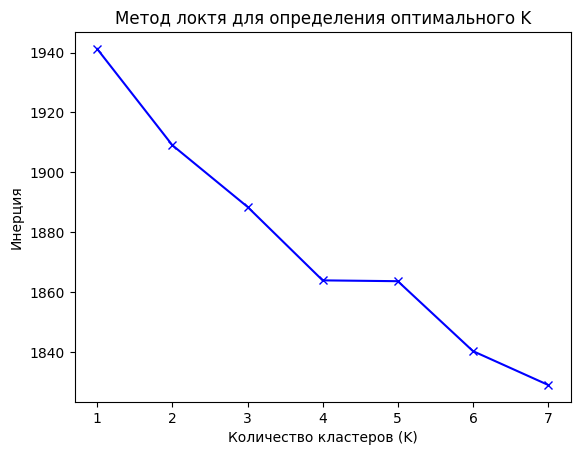

In [28]:
plt.plot(k_values, inertias, 'bx-')
plt.xlabel('Количество кластеров (K)')
plt.ylabel('Инерция')
plt.title('Метод локтя для определения оптимального K')
plt.show()

In [29]:
#локоть нам рекомендует 4, вроде как. Все еще есть ощущение, что я что-то явно делаю не так

In [30]:
from sklearn.cluster import KMeans

# применение k-means
n_clusters = 8  # количество кластеров
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

# вывод первых строк с кластерной меткой
print(df.head())

                                            Contents  \
0  I love ASOS and allCustomer service they are j...   
1  My order was left outside and the school kids ...   
2                        Helpful and friendly staff.   
3  Replied quickly and made sure their customers ...   
4  Rebecca was patient and helpful with my querie...   

                                  processed_contents  cluster  
0             love asos allcustomer service adorable        2  
1  order left outside school kids ransacked howev...        1  
2                             helpful friendly staff        0  
3          replied quickly made sure customers happy        1  
4  rebecca patient helpful queries though seems l...        5  


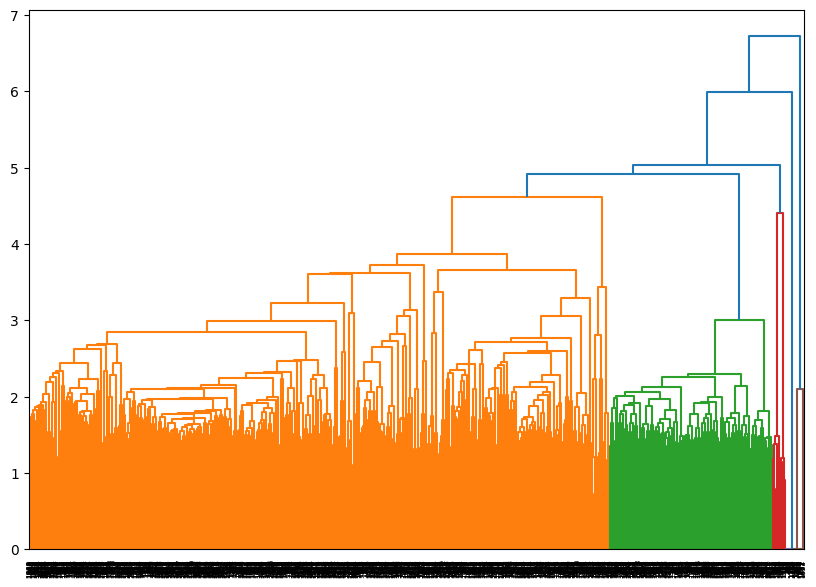

                                            Contents  \
0  I love ASOS and allCustomer service they are j...   
1  My order was left outside and the school kids ...   
2                        Helpful and friendly staff.   
3  Replied quickly and made sure their customers ...   
4  Rebecca was patient and helpful with my querie...   

                                  processed_contents  cluster  
0             love asos allcustomer service adorable        0  
1  order left outside school kids ransacked howev...        4  
2                             helpful friendly staff        0  
3          replied quickly made sure customers happy        4  
4  rebecca patient helpful queries though seems l...        4  


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt


# векторизация
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['processed_contents'])


# агломеративная кластеризации
clustering = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
df['cluster'] = clustering.fit_predict(X.toarray())

# визуализация
linked = linkage(X.toarray(), 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked,
           orientation='top',
           labels=df.index,
           distance_sort='descending',
           show_leaf_counts=True)
plt.show()

print(df.head())

In [32]:
#визуализация выглядит странно, мягко говоря. Возможно, стоит попробовать метод "Силуэта".
#хотя, вероятно, повлияло то, что у нас были ранее какие-то проблемы с матрицей, которые мне не удалось решить...
#у меня где-то есть огромная ошибка, но я не могу понять где(есть понимание, сто кластеры должны выглядеть адекватно, и не накладываться друг на друга)